In [2]:
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm


In [3]:
def func(x, y):
    return (x**2) * np.sin(y)

In [4]:
def grad(x, y):
    return np.array([2*x*np.sin(y), (x**2) *np.cos(y)])

In [5]:
x = np.outer(np.linspace(-5.0, 5.0, 100), np.ones(100))
y = np.outer(np.ones(100), np.linspace(-5.0,5.0,100))
z = func(x, y)

Text(0.5, 0, 'eixo z')

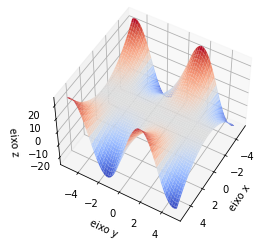

In [6]:
ax = plt.axes(projection="3d")
ax.view_init(50, 30)
ax.plot_surface(x, y, z, cmap=cm.coolwarm)
ax.set_xlabel("eixo x")
ax.set_ylabel("eixo y")
ax.set_zlabel("eixo z")

Text(0, 0.5, 'eixo y')

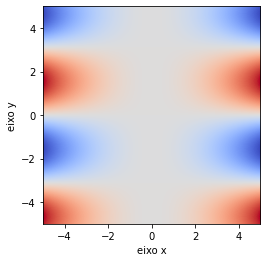

In [7]:
ax = plt.axes()
ax.imshow(-z.T, cmap=cm.coolwarm, extent=(-5, 5, -5, 5), interpolation='bilinear')
ax.set_xlabel("eixo x")
ax.set_ylabel("eixo y")

In [8]:
qx = []
qy = []
qu = []
qv = []

for xi in np.linspace(-1.5*np.pi, 1.5*np.pi, 15):
    for yi in np.linspace(-1.5*np.pi, 1.5*np.pi, 15):
        ui, vi = grad(xi, yi)
        qx.append(xi)
        qy.append(yi)
        qu.append(ui)
        qv.append(vi)


Text(0, 0.5, 'eixo y')

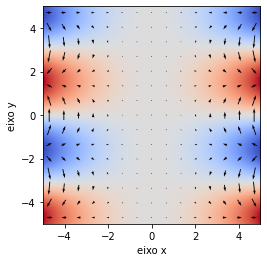

In [9]:
ax = plt.axes()
ax.imshow(-z.T, cmap=cm.coolwarm, extent=(-5,5,-5,5), interpolation='bilinear')
Q = ax.quiver(qx, qy, qu, qv, scale = 360.0, pivot = 'mid')
qk = ax.quiverkey(Q, 0.1, 0.1, 0.1, '', labelpos="E", coordinates="figure")
ax.set_xlabel("eixo x")
ax.set_ylabel("eixo y")

In [10]:
def func3d(x, y):
    f = 0.8
    return np.cos(x*f) * (25 - x**2) - (np.cos(y*f)) * (25 - y**2)

In [11]:
def grad3d(x, y):
    h = 0.01
    f = func3d(x, y)
    df_dx = (func3d(x + h, y) - f)/h
    df_dy = (func3d(x, y + h) - f)/h
    return np.array([df_dx, df_dy])

In [20]:
def grad_desc(x, y, step=0.01):
    gx, gy = grad3d(x, y)
    gx = x - step * gx
    gy = y - step * gy
    return np.array([gx, gy])


In [13]:
x = np.outer(np.linspace(-5.0, 5.0, 100), np.ones(100))
y = np.outer(np.ones(100), np.linspace(-3.0,7.0,100))
z = func3d(x, y)

Text(0.5, 0.5, 'eixo y')

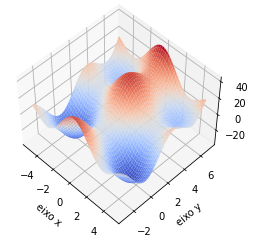

In [14]:
ax = plt.axes(projection="3d")
ax.view_init(50,-45)
ax.plot_surface(x,y,z, cmap=cm.coolwarm)
ax.set_xlabel("eixo x")
ax.set_ylabel("eixo y")

(-5.5, 5.5, -3.5, 7.5)

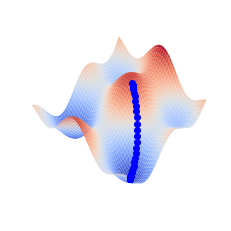

In [21]:
x0 = 0.5
y0 = 3.0
zi = func3d(x0, y0)
xs = [x0]
ys = [y0]
zs = [zi]

for i in range(100):
    x0, y0 = grad_desc(x0, y0)
    zi = func3d(x0, y0)
    xs.append(x0)
    ys.append(y0)
    zs.append(zi)

ax = plt.axes(projection="3d")
ax.view_init(50, -45)
ax.plot_surface(x, y, z, cmap=cm.coolwarm)
ax.plot(xs, ys, zs, 'o', c="b", zorder=100)
plt.axis("off")